# World Happiness 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from config import api_key
import time

In [2]:
#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together

Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")

happiness_report = Merge1920_df
happiness_report

,country,happiness_score_2019,GDP_per_capita_2019,social_support_2019,life_expectancy_2019,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
143,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
144,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
145,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2019 is 0.64
The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2020 is 0.66


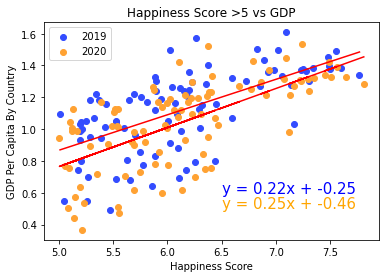

<ipython-input-3-1a8ff5b59b2d>:40: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(Merge_less2020_df["happiness_score_2020"], Merge_less2020_df["GDP_per_capita_2020"], Label = "2020", c = "#FFA233")


The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2019 is 0.41
The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2020 is 0.33


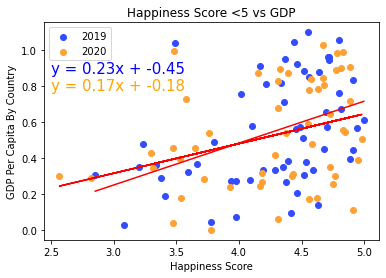

In [3]:
Merge_grt_df = happiness_report[happiness_report.happiness_score_2019 > 5]
Merge_less_df = happiness_report[happiness_report.happiness_score_2019 < 5]

Merge_grt2020_df = happiness_report[happiness_report.happiness_score_2020 > 5]
Merge_less2020_df = happiness_report[happiness_report.happiness_score_2020 < 5]

#2019 GDP data for countries with a happiness score of 5 or greater
plt.scatter(Merge_grt_df["happiness_score_2019"], Merge_grt_df["GDP_per_capita_2019"], label = "2019", c = "#334CFF")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_grt_df["happiness_score_2019"],Merge_grt_df["GDP_per_capita_2019"])
regress_values = Merge_grt_df["happiness_score_2019"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_grt_df["happiness_score_2019"],regress_values,"r-")
plt.annotate(line_eq,(6.5,0.6),fontsize=15,color="blue")
#2020 GDP data for countries with a happiness score of 5 or greater
plt.scatter(Merge_grt2020_df["happiness_score_2020"], Merge_grt2020_df["GDP_per_capita_2020"], label = "2020", c = "#FFA233")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_grt2020_df["happiness_score_2020"],Merge_grt2020_df["GDP_per_capita_2020"])
regress_values = Merge_grt2020_df["happiness_score_2020"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_grt2020_df["happiness_score_2020"],regress_values,"r-")
plt.annotate(line_eq,(6.5,0.5),fontsize=15,color="orange")
plt.xlabel("Happiness Score")
plt.ylabel("GDP Per Capita By Country")
plt.title("Happiness Score >5 vs GDP")
plt.legend()
plt.savefig('Grt_GDP.png')
#correlation
correlation_Grt_2019 = st.pearsonr(Merge_grt_df["happiness_score_2019"], Merge_grt_df["GDP_per_capita_2019"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2019 is {round(correlation_Grt_2019[0],2)}")
correlation_Grt_2020 = st.pearsonr(Merge_grt2020_df["happiness_score_2020"], Merge_grt2020_df["GDP_per_capita_2020"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of >5 in 2020 is {round(correlation_Grt_2020[0],2)}")
plt.show()
#2019 GDP data for countries with a happiness score of 5 or less
plt.scatter(Merge_less_df["happiness_score_2019"], Merge_less_df["GDP_per_capita_2019"], label = "2019", c = "#334CFF")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_less_df["happiness_score_2019"],Merge_less_df["GDP_per_capita_2019"])
regress_values = Merge_less_df["happiness_score_2019"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_less_df["happiness_score_2019"],regress_values,"r-")
plt.annotate(line_eq,(2.5,0.87),fontsize=15,color="blue")
#2020 GDP data for countries with a happiness score of 5 or less
plt.scatter(Merge_less2020_df["happiness_score_2020"], Merge_less2020_df["GDP_per_capita_2020"], Label = "2020", c = "#FFA233")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Merge_less2020_df["happiness_score_2020"],Merge_less2020_df["GDP_per_capita_2020"])
regress_values = Merge_less2020_df["happiness_score_2020"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Merge_less2020_df["happiness_score_2020"],regress_values,"r-")
plt.annotate(line_eq,(2.5,0.78),fontsize=15,color="orange")
#making graph based on data
plt.xlabel("Happiness Score")
plt.ylabel("GDP Per Capita By Country")
plt.title("Happiness Score <5 vs GDP")
plt.legend()
plt.savefig('Less_GDP.png')
#correlation
correlation_less_2019 = st.pearsonr(Merge_less_df["happiness_score_2019"], Merge_less_df["GDP_per_capita_2019"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2019 is {round(correlation_less_2019[0],2)}")
correlation_less_2020 = st.pearsonr(Merge_less2020_df["happiness_score_2020"], Merge_less2020_df["GDP_per_capita_2020"])
print(f"The correlation between GDP and Happiness Score for countries with a Happiness score of <5 in 2020 is {round(correlation_less_2020[0],2)}")
plt.show()

The correlation between both factors is 0.42
The correlation between both factors is 0.43


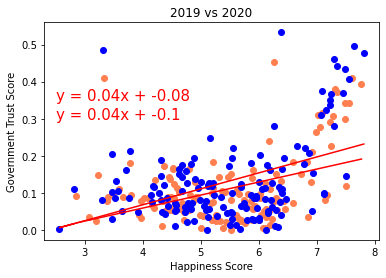

In [4]:

# Happy_2020 = Merge_df["happiness_score_2020"]
x_axis = happiness_report["happiness_score_2019"]
y_axis = happiness_report["corruption_2019"]
plt.scatter(x_axis, y_axis, c='coral')
plt.xlabel("Happiness Score")
plt.ylabel("Corruption Score")
plt.title("Happiness vs. Government Trust 2019")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(2.5,0.35),fontsize=15,color="red")
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis = happiness_report["happiness_score_2020"]
y_axis = happiness_report["corruption_2020"]
plt.scatter(x_axis, y_axis, c='blue')
plt.xlabel("Happiness Score")
plt.ylabel("Government Trust Score")
plt.title("2019 vs 2020")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(2.5,0.30),fontsize=15,color="red")
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP20192020.png')
plt.show()


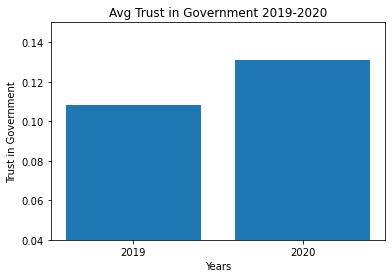

In [5]:
Trust_2019 = happiness_report["corruption_2019"].mean()
Trust_2020 = happiness_report["corruption_2020"].mean()
y = [Trust_2019, Trust_2020]
x = ['2019', '2020']
plt.bar(x, y)
#plt.plot(x, y)
plt.ylim(0.04,0.15)
plt.title("Avg Trust in Government 2019-2020")
plt.ylabel("Trust in Government")
plt.xlabel("Years")
plt.savefig('Trust20192020.png')
plt.show()

In [6]:
round(happiness_report['corruption_2019'].mean(),2)

0.11

In [7]:
round(happiness_report['corruption_2020'].mean(),2)

0.13

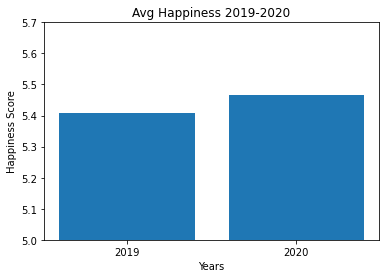

In [8]:

Happy_2019 = happiness_report["happiness_score_2019"].mean()
Happy_2020 = happiness_report["happiness_score_2020"].mean()
y = [Happy_2019, Happy_2020]
x = ['2019', '2020']
plt.bar(x, y)
#plt.plot(x, y)
plt.ylim(5,5.7)
plt.title("Avg Happiness 2019-2020")
plt.ylabel("Happiness Score")
plt.xlabel("Years")
plt.savefig('Happy20192020.png')
plt.show()

In [9]:
#configure gmaps
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [10]:
#obtain country latitude and longitude using google geocode api
lat = []
lng = []
for index, row in Merge1920_df.iterrows():
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={row['country']}&key={gkey}"
    print(f"{row['country']}")
    try:
        response = requests.get(target_url).json()["results"][0]['geometry']['location']
        lat.append(response["lat"])
        lng.append(response["lng"])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print(f"Index {index} has missing lat or lng SKIPPING")

Finland
Denmark
Norway
Iceland
Netherlands
Switzerland
Sweden
New Zealand
Canada
Austria
Australia
Costa Rica
Israel
Luxembourg
United Kingdom
Ireland
Germany
Belgium
United States
Czech Republic
United Arab Emirates
Malta
Mexico
France
Chile
Guatemala
Saudi Arabia
Spain
Panama
Brazil
Uruguay
Singapore
El Salvador
Italy
Bahrain
Slovakia
Poland
Uzbekistan
Lithuania
Colombia
Slovenia
Nicaragua
Kosovo
Argentina
Romania
Cyprus
Ecuador
Kuwait
Thailand
Latvia
South Korea
Estonia
Jamaica
Mauritius
Japan
Honduras
Kazakhstan
Bolivia
Hungary
Paraguay
Peru
Portugal
Pakistan
Russia
Philippines
Serbia
Moldova
Libya
Montenegro
Tajikistan
Croatia
Dominican Republic
Bosnia and Herzegovina
Turkey
Malaysia
Belarus
Greece
Mongolia
Nigeria
Kyrgyzstan
Turkmenistan
Algeria
Morocco
Azerbaijan
Lebanon
Indonesia
China
Vietnam
Cameroon
Bulgaria
Ghana
Ivory Coast
Nepal
Jordan
Benin
Congo (Brazzaville)
Gabon
Laos
South Africa
Albania
Venezuela
Cambodia
Palestinian Territories
Senegal
Namibia
Niger
Burkina Faso
Ar

In [11]:
#add latitudes and longitudes to dataframe
coord_df = pd.DataFrame({'country':happiness_report.country,'lat':lat,'lng':lng})
coord_merge_df = pd.merge(happiness_report, coord_df, on='country')
coord_merge_df

,country,happiness_score_2019,GDP_per_capita_2019,social_support_2019,life_expectancy_2019,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020,lat,lng
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,61.924110,25.748151
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,56.263920,9.501785
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,60.472024,8.468946
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,64.963051,-19.020835
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,52.132633,5.291266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,-1.940278,29.873888
143,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,-6.369028,34.888822
144,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,33.939110,67.709953
145,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,6.611111,20.939444


In [12]:
# Plot 2019 Happiness Heatmap
coord_merge_df = coord_merge_df.sort_values(by="happiness_score_2019", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
happiness_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["happiness_score_2019"].head(10))
happiness_layer.max_intensity = 8
happiness_layer.point_radius = 5
happiness_layer.dissipating = False
fig.add_layer(happiness_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [13]:
# Plot 2019 Trust in Government Heatmap
coord_merge_df = coord_merge_df.sort_values(by="corruption_2019", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
corrupt_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["corruption_2019"].head(10))
corrupt_layer.max_intensity = 1
corrupt_layer.point_radius = 5
corrupt_layer.dissipating = False
fig.add_layer(corrupt_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [14]:
# Plot 2020 Happiness Heatmap
coord_merge_df = coord_merge_df.sort_values(by="happiness_score_2020", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
happiness_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["happiness_score_2020"].head(10))
happiness_layer.max_intensity = 10
happiness_layer.point_radius = 5
happiness_layer.dissipating = False
fig.add_layer(happiness_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [15]:
# Plot 2020 Trust in Government Heatmap
coord_merge_df = coord_merge_df.sort_values(by="corruption_2020", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
corrupt_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["corruption_2020"].head(10))
corrupt_layer.max_intensity = .5
corrupt_layer.point_radius = 5
corrupt_layer.dissipating = False
fig.add_layer(corrupt_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [16]:
# Plot 2019 GDP Heatmap
coord_merge_df = coord_merge_df.sort_values(by="GDP_per_capita_2019", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
gdp_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["GDP_per_capita_2019"].head(10))
gdp_layer.max_intensity = 1.6
gdp_layer.point_radius = 5
gdp_layer.dissipating = False
fig.add_layer(corrupt_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [17]:
# Plot 2020 GDP Heatmap
coord_merge_df = coord_merge_df.sort_values(by="GDP_per_capita_2020", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
gdp_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["GDP_per_capita_2020"].head(10))
gdp_layer.max_intensity = 1.6
gdp_layer.point_radius = 5
gdp_layer.dissipating = False
fig.add_layer(corrupt_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [18]:
# Plot 2020 GDP Heatmap
coord_merge_df = coord_merge_df.sort_values(by="GDP_per_capita_2020", ascending=False)
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout,map_type='HYBRID')
gdp_layer = gmaps.heatmap_layer(coord_merge_df[["lat","lng"]].head(10), coord_merge_df["GDP_per_capita_2020"].head(10))
gdp_layer.max_intensity = 1.6
gdp_layer.point_radius = 5
gdp_layer.dissipating = False
fig.add_layer(corrupt_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

<function matplotlib.pyplot.show(close=None, block=None)>

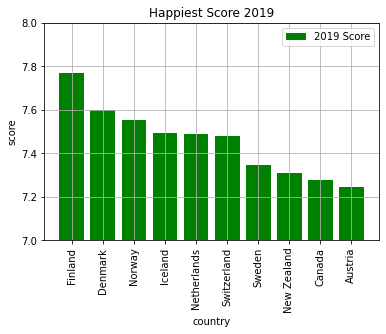

In [19]:
#Plot 2019 Happiness Score
data=Merge1920_df.head(10)
data=Merge1920_df.sort_values(by='happiness_score_2019', ascending=False).head(10)
plt.bar(data['country'],data['happiness_score_2019'],label='2019 Score', color='green')
plt.title("Happiest Score 2019")
plt.ylabel('score')
plt.ylim(7,8)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

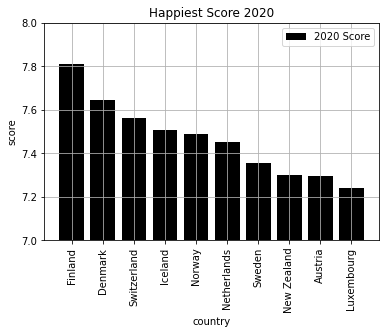

In [20]:
#Plot 2020 GDP Per Capita
data=Merge1920_df.sort_values(by='happiness_score_2020', ascending=False).head(10)
plt.bar(data['country'],data['happiness_score_2020'],label='2020 Score', color='black')
plt.title("Happiest Score 2020")
plt.ylabel('score')
plt.ylim(7,8)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

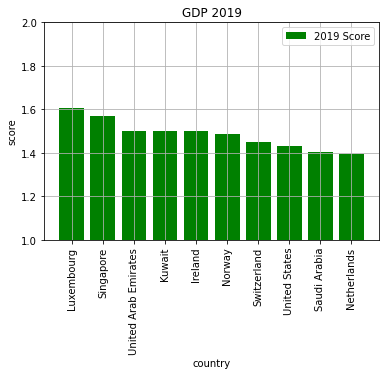

In [21]:
#Plot 2019 GDP Per Capita
data=Merge1920_df.head(10)
data=Merge1920_df.sort_values(by='GDP_per_capita_2019', ascending=False).head(10)
plt.bar(data['country'],data['GDP_per_capita_2019'],label='2019 Score', color='green')
plt.title("GDP 2019")
plt.ylabel('score')
plt.ylim(1,2)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

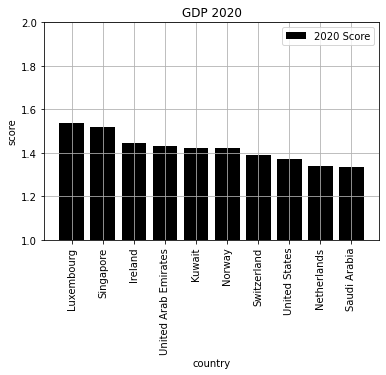

In [22]:
#Plot 2020 GDP Per Capita
data=Merge1920_df.sort_values(by='GDP_per_capita_2020', ascending=False).head(10)
plt.bar(data['country'],data['GDP_per_capita_2020'],label='2020 Score', color='black')
plt.title("GDP 2020")
plt.ylabel('score')
plt.ylim(1,2)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

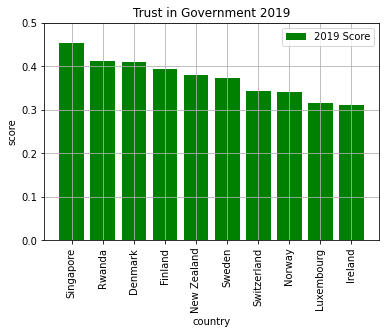

In [23]:
#Plot 2019 Trust in Government
data=Merge1920_df.head(10)
data=Merge1920_df.sort_values(by='corruption_2019', ascending=False).head(10)
plt.bar(data['country'],data['corruption_2019'],label='2019 Score', color='green')
plt.title("Trust in Government 2019")
plt.ylabel('score')
plt.ylim(0,0.5)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.grid()
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

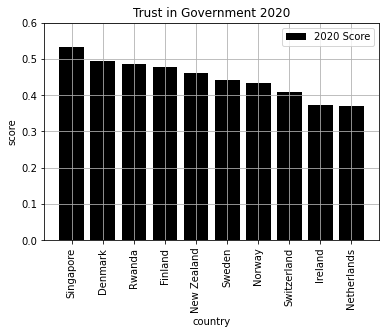

In [24]:
#Plot 2020 Trust in Government
data=Merge1920_df.sort_values(by='corruption_2020', ascending=False).head(10)
plt.bar(data['country'],data['corruption_2020'],label='2020 Score', color='black')
plt.title("Trust in Government 2020")
plt.ylabel('score')
plt.ylim(0,0.6)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.grid()
plt.legend()
plt.show

In [25]:
happiness_report = Merge1920_df
happiness_report


,country,happiness_score_2019,GDP_per_capita_2019,social_support_2019,life_expectancy_2019,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
143,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
144,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
145,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [26]:
happyscore_byyear = round(happiness_report.filter(['country','happiness_score_2020','happiness_score_2019']),2)
happyscore_byyear.head(10)

,country,happiness_score_2020,happiness_score_2019
0,Finland,7.81,7.77
1,Denmark,7.65,7.60
2,Norway,7.49,7.55
3,Iceland,7.50,7.49
4,Netherlands,7.45,7.49
5,Switzerland,7.56,7.48
6,Sweden,7.35,7.34
7,New Zealand,7.30,7.31
8,Canada,7.23,7.28
9,Austria,7.29,7.25


In [27]:
happyscore_byyear.sort_values(by=['happiness_score_2020'], inplace=True, ascending=False)
happyscore_byyear
happyscore_byyear.head()

,country,happiness_score_2020,happiness_score_2019
0,Finland,7.81,7.77
1,Denmark,7.65,7.60
5,Switzerland,7.56,7.48
3,Iceland,7.50,7.49
2,Norway,7.49,7.55


In [28]:
happyscore_year = happyscore_byyear.rename(columns={'happiness_score_2019': '2019', 'happiness_score_2020': '2020'})
happyscore_year

,country,2020,2019
0,Finland,7.81,7.77
1,Denmark,7.65,7.60
5,Switzerland,7.56,7.48
3,Iceland,7.50,7.49
2,Norway,7.49,7.55
...,...,...,...
145,Central African Republic,3.48,3.08
142,Rwanda,3.31,3.33
137,Zimbabwe,3.30,3.66
146,South Sudan,2.82,2.85


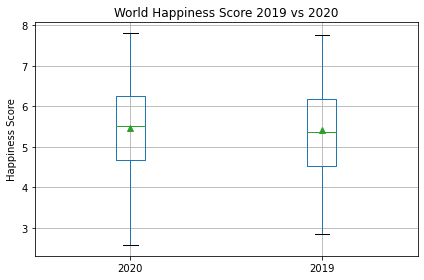

In [29]:
blue_out= dict(markerfacecolor='blue',markersize=12)
box = happyscore_year.boxplot(showmeans=True)
plt.ylabel('Happiness Score')
plt.title('World Happiness Score 2019 vs 2020')
plt.tight_layout()

In [30]:
avg_2019 = happyscore_byyear['happiness_score_2019'].mean()
avg_2020 = happyscore_byyear['happiness_score_2020'].mean()

In [31]:
happyyear_df = round(pd.DataFrame ({"2019": [avg_2019], "2020": [avg_2020]}),2)
happyyear_df

,2019,2020
0,5.41,5.46
